In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_percentage_error

from sklearn.metrics import mean_squared_error as mse

import os


In [2]:
df=pd.read_csv("C:/Users/purna/Desktop/TSF/tcs_stock.csv",usecols=['Date','Close'],parse_dates=['Date'],index_col='Date')
df.head()#return the first n rows by default 5

,Close
Date,
2015-01-01,2545.55
2015-01-02,2579.45
2015-01-05,2540.25
2015-01-06,2446.60
2015-01-07,2417.70


In [17]:
df.shape #return no.of data points
df.loc['2015-01-01',:]

Close    2545.55
Name: 2015-01-01 00:00:00, dtype: float64

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 248 entries, 2015-01-01 to 2015-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   248 non-null    float64
dtypes: float64(1)
memory usage: 12.0 KB


In [5]:
print("Min:",df.index.min(),df.Close.min()) #printing the least number of date and closing price from the data set
print("Max:",df.index.max(),df.Close.max())

Min: 2015-01-01 00:00:00 2319.8
Max: 2015-12-31 00:00:00 2776.0


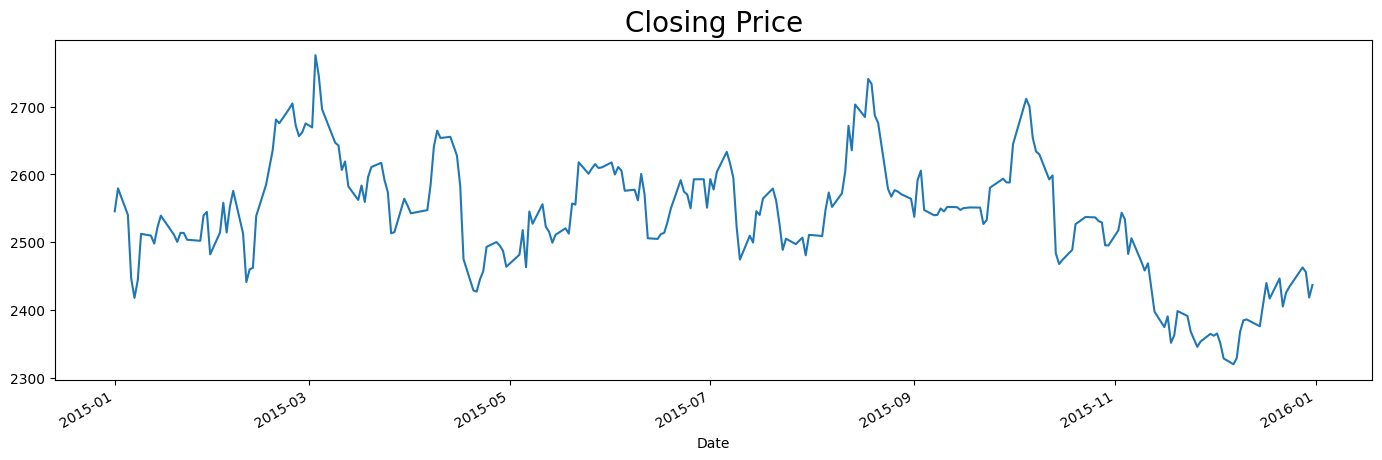

In [6]:
plt.figure(figsize=(17,5))
df.Close.plot()
plt.title("Closing Price",fontsize=20)
plt.show()

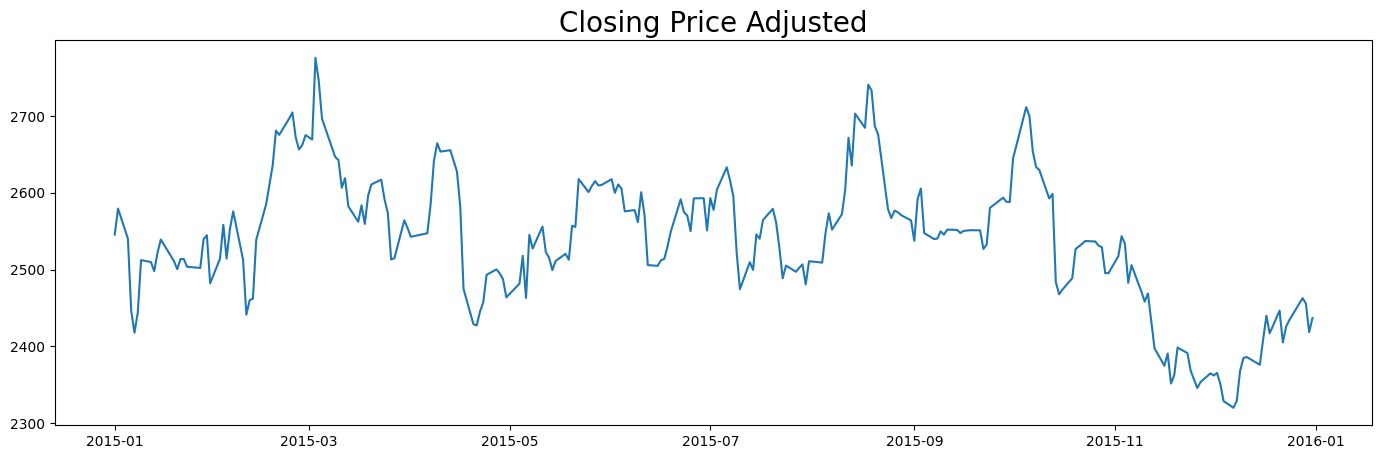

In [7]:
plt.figure(figsize=(17,5))
stock_price=pd.concat([df.Close[:'2015-06-12'],df.Close['2015-06-15':]])
plt.plot(stock_price)
plt.title("Closing Price Adjusted",fontsize=20)
plt.show()

In [8]:
prev_values=stock_price.iloc[:180]
y_test=stock_price.iloc[180:]
def plot_pred(pred,title):
    plt.figure(figsize=(17,5))
    plt.plot(prev_values,label='Train')
    plt.plot(y_test,label='Actual')
    plt.plot(pred,label="Predicted")
    plt.ylabel("stock prices")
    plt.title(title,fontsize=20)
    plt.legend()
    plt.show()

In [9]:
#Average of previouse values
y_av=pd.Series(np.repeat(prev_values.mean(),68),index=y_test.index)
mse(y_av,y_test)

17917.30865525145

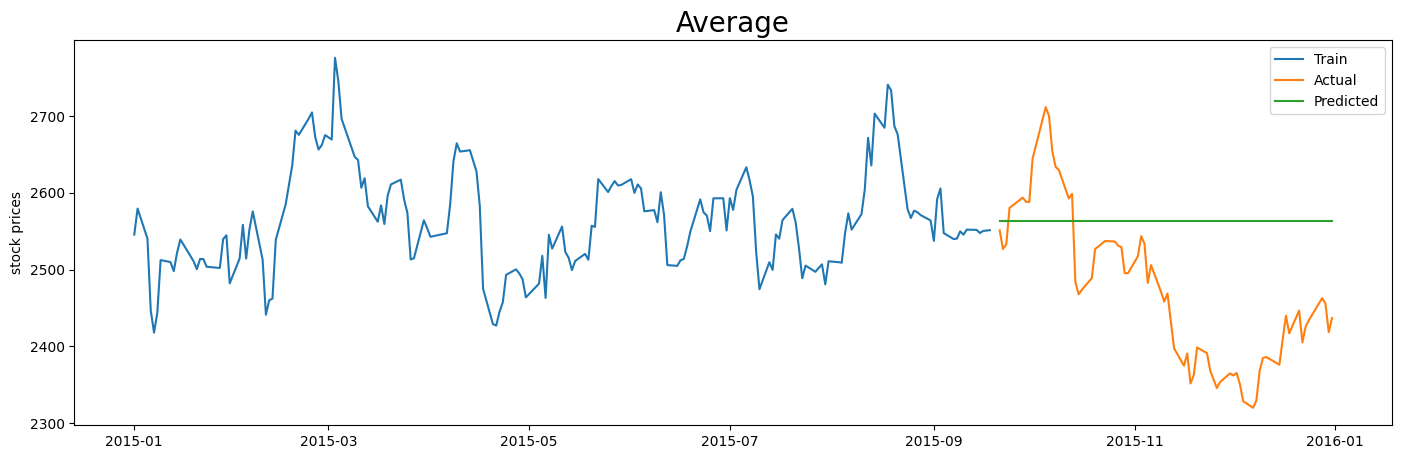

In [10]:
plot_pred(y_av,"Average")

In [11]:
np.sqrt(mse(y_av,y_test))

133.8555514547359

In [12]:
y_train=stock_price[80:180]
y_test=stock_price[180:]
print("y train:",y_train.shape,"\ny test:",y_test.shape)

y train: (100,) 
y test: (68,)


In [13]:
X_train=pd.DataFrame([list(stock_price[i:i+80]) for i in range(100)],
                    columns=range(80,0,-1),index=y_train.index)
X_test=pd.DataFrame([list(stock_price[i:i+80]) for i in range(100,168)],
                   columns=range(80,0,-1),index=y_test.index)
X_train

,80,79,78,77,76,75,74,73,72,71,...,10,9,8,7,6,5,4,3,2,1
Date,,,,,,,,,,,,,,,,,,,,,
2015-04-30,2545.55,2579.45,2540.25,2446.60,2417.70,2443.80,2512.30,2509.70,2497.90,2521.95,...,2582.80,2474.85,2428.80,2427.05,2445.10,2457.25,2493.05,2500.20,2495.00,2487.30
2015-05-04,2579.45,2540.25,2446.60,2417.70,2443.80,2512.30,2509.70,2497.90,2521.95,2539.10,...,2474.85,2428.80,2427.05,2445.10,2457.25,2493.05,2500.20,2495.00,2487.30,2463.70
2015-05-05,2540.25,2446.60,2417.70,2443.80,2512.30,2509.70,2497.90,2521.95,2539.10,2532.15,...,2428.80,2427.05,2445.10,2457.25,2493.05,2500.20,2495.00,2487.30,2463.70,2481.55
2015-05-06,2446.60,2417.70,2443.80,2512.30,2509.70,2497.90,2521.95,2539.10,2532.15,2511.00,...,2427.05,2445.10,2457.25,2493.05,2500.20,2495.00,2487.30,2463.70,2481.55,2517.85
2015-05-07,2417.70,2443.80,2512.30,2509.70,2497.90,2521.95,2539.10,2532.15,2511.00,2500.45,...,2445.10,2457.25,2493.05,2500.20,2495.00,2487.30,2463.70,2481.55,2517.85,2463.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-09-11,2617.90,2601.00,2608.85,2615.25,2609.50,2610.30,2617.75,2599.90,2610.90,2605.65,...,2570.85,2564.05,2537.40,2591.80,2605.60,2547.45,2539.75,2540.30,2549.75,2545.40
2015-09-14,2601.00,2608.85,2615.25,2609.50,2610.30,2617.75,2599.90,2610.90,2605.65,2575.85,...,2564.05,2537.40,2591.80,2605.60,2547.45,2539.75,2540.30,2549.75,2545.40,2552.00
2015-09-15,2608.85,2615.25,2609.50,2610.30,2617.75,2599.90,2610.90,2605.65,2575.85,2577.45,...,2537.40,2591.80,2605.60,2547.45,2539.75,2540.30,2549.75,2545.40,2552.00,2551.65


In [14]:
from sklearn.linear_model import LinearRegression 
lr=LinearRegression()

lr.fit(X_train,y_train)
y_lr=lr.predict(X_test)
y_lr=pd.Series(y_lr,index=y_test.index)
mse(y_test,y_lr) 


6347.561021880389

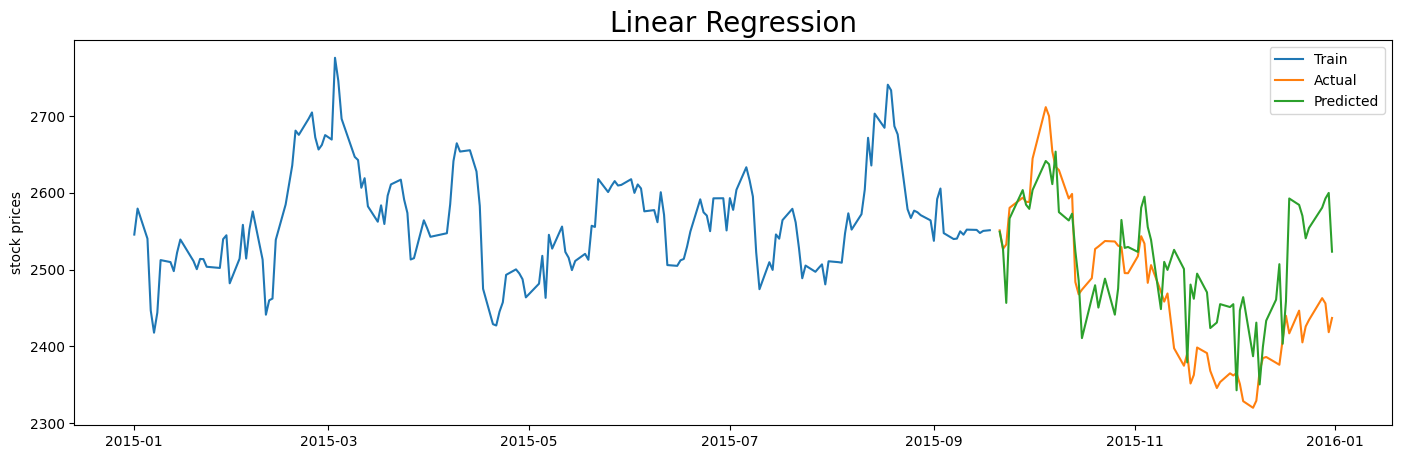

In [15]:
plot_pred(y_lr,"Linear Regression")

In [16]:
np.sqrt(mse(y_test,y_lr))

79.67158227298106